## [Understanding PyTorch with an example: a step-by-step tutorial](https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e)

In [51]:
import numpy as np

In [52]:
# Data Generation, random data around the line y = 2x + 1
np.random.seed(42)
x = np.random.rand(100, 1)  # uniform distribution [0, 1]
y = 1 + 2*x + 0.1*np.random.randn(100, 1)  # normal distribution, mean 0 and variance 1

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Use first 80 random indices for training
train_idx = idx[:80]
# Use remaining indices for validation
val_idx = idx[80:]

# Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

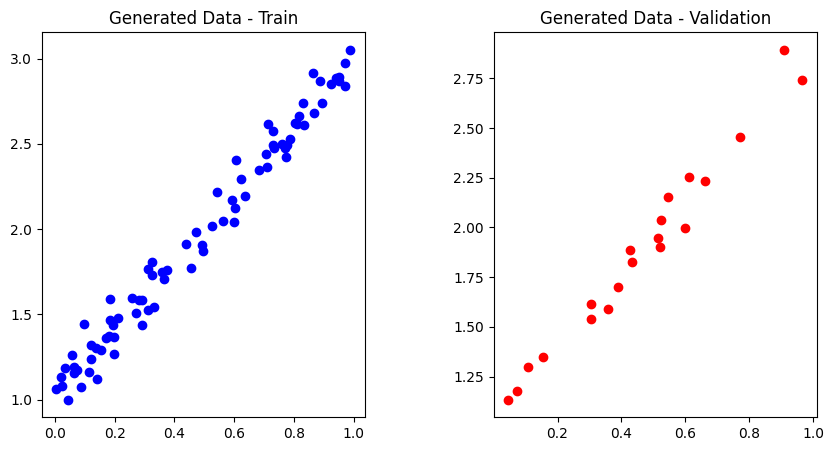

In [53]:
import matplotlib.pyplot as plt

# Define the x and y values for the first plot
x1 = x_train
y1 = y_train

# Define the x and y values for the second plot
x2 = x_val
y2 = y_val

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Space the plots further apart
plt.subplots_adjust(wspace=0.4)

# Plot the first plot
ax1.plot(x1, y1, marker="o", color="blue", linestyle="None")
ax1.set_title("Generated Data - Train")

# Plot the second plot
ax2.plot(x2, y2, marker="o", color="red", linestyle="None")
ax2.set_title("Generated Data - Validation")

# Add a title to the figure
# fig.suptitle("Two Plots Side by Side")

# Show the plot
plt.show()


# n_epochs: 1000
# len(losses): 5000
# len(val_losses): 2000
# i: 0  len(items): 2
# j: 0  len(item): 16
# j: 1  len(item): 16
# ===
# i: 1  len(items): 2
# j: 0  len(item): 16
# j: 1  len(item): 16
# ===
# i: 2  len(items): 2
# j: 0  len(item): 16
# j: 1  len(item): 16
# ===
# i: 3  len(items): 2
# j: 0  len(item): 16
# j: 1  len(item): 16
# ===
# i: 4  len(items): 2
# j: 0  len(item): 16
# j: 1  len(item): 16
# ===
# i: 5  len(items): 2
# j: 0  len(item): 10
# j: 1  len(item): 10
# ===


In [55]:
model.state_dict()

OrderedDict([('a', tensor([1.0076])), ('b', tensor([1.9877]))])

In [56]:
# Initialize parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)
print('a and b after initialization')
print(f'a: {a}, b: {b}\n')

# Set learning rate
lr = 1e-1

# Define number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  # Compute predicted output
  yhat = a + b*x_train

  # Calculate error
  error = (y_train - yhat)

  # Calcualte loss
  loss = (error**2).mean()

  # Calculate gradients for "a" (a constant) and "b" (the slope)
  a_grad = -2*error.mean()
  b_grad = -2*(x_train*error).mean()

  # Update parameters a and b using gradients and learning rate
  a += -lr*a_grad
  b += -lr*b_grad

print('a and b after our gradient descent')
print(f'a: {a}, b: {b}')

a and b after initialization
a: [0.49671415], b: [-0.1382643]

a and b after our gradient descent
a: [1.02354094], b: [1.96896411]


In [ ]:
# Sanity check: do we get the same results as our model
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print('intercept and coef. from  Scikit-Learn')
print(f'linr.intercept_: {linr.intercept_},  linr.coef_[0]: {linr.coef_[0]}')

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Transform data from numpy arrays to pytorch tensors
# and send them to chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

print(f'type(x_train):         {type(x_train)}')
print(f'type(x_train_tensor):  {type(x_train_tensor)}')
print(f'x_train_tensor.type(): {x_train_tensor.type()}')

In [ ]:
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(f'a: {a}\nb: {b}')

In [ ]:
# this won't work if device is GPU
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(f'a: {a}\nb: {b}')

In [ ]:
# this works if device is GPU
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
a.requires_grad_()  # _ makes changes in-place
b.requires_grad_()  # _ makes changes in-place
print(f'a: {a}\nb: {b}')


In [ ]:
# Pytorch recommends specifying device at creation
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(f'a: {a}\nb: {b}')

In [ ]:
lr = 1e-1
n_epochs = 1000
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

for epach in range(n_epochs):
  yhat = a + b*x_train_tensor
  error = y_train_tensor - yhat
  loss = (error**2).mean()
  loss.backward()  # no more manual computation of gradients
  print(f'a.grad: {a.grad},  b.grad: {b.grad}')

  # Use no_grad to keep the update out of the gradient computation
  with torch.no_grad():
    a += -lr*a.grad
    b += -lr*b.grad

  a.grad.zero_()
  b.grad.zero_()

print(f'a: {a},  b: {b}')

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
yhat = a + b*x_train_tensor
error = y_train_tensor - yhat
loss = (error**2).mean()

In [ ]:
make_dot(yhat)

In [ ]:
make_dot(error)

In [ ]:
make_dot(loss)

In [ ]:
a_nograd = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
yhat = a_nograd + b*x_train_tensor
print(f'a_nograd: no gradients, no graph')
make_dot(yhat)

In [ ]:
# non-sense code to demo control flow statements
yhat = a + b*x_train_tensor
error = y_train_tensor - yhat
loss = (error**2).mean()
if loss > 0:
  yhat2 = b*x_train_tensor
  error2 = y_train_tensor - yhat2
loss += error2.mean()
make_dot(loss)  

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print('a and b before optimizing')
print(f'a: {a},  b: {b}\n')

lr = 1e-1
n_epochs = 1000

# Use SGD optimizer to update parameters
optimizer = optim.SGD([a, b], lr=lr)

print('Peform batch gradient descent since x_train_tensor has all the data')
print(f'len(x_train_tensor): {len(x_train_tensor)}\n')

for epoch in range(n_epochs):
  yhat = a + b*x_train_tensor
  error = y_train_tensor - yhat
  loss = (error**2).mean()

  loss.backward()  # calculate gradients
  optimizer.step()  # update parameters
  optimizer.zero_grad()  # zero out gradients

print('a and b after optimizing')
print(f'a: {a},  b: {b}')

In [ ]:
# Use pytorch loss functions
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print('a and b before optimizing')
print(f'a: {a},  b: {b}\n')

lr = 1e-1
n_epochs = 1000

# Use MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Use SGD optimizer to update parameters
optimizer = optim.SGD([a, b], lr=lr)

print('Peform batch gradient descent, matrix multiplication with x_train_tensor process all the data at onnce')
print(f'len(x_train_tensor): {len(x_train_tensor)}\n')

for epoch in range(n_epochs):  # all training data is processed in an epoch
  yhat = a + b*x_train_tensor
  error = y_train_tensor - yhat

  # loss = (error**2).mean()
  loss = loss_fn(y_train_tensor, yhat)

  loss.backward()  # calculate gradients
  optimizer.step()  # update parameters
  optimizer.zero_grad()  # zero out gradients

print('a and b after optimizing')
print(f'a: {a},  b: {b}')

In [ ]:
# Build a simple model
class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # Wrap "a" and "b" in nn.Parameter to make them model parameters
    # Allow model's parameters() method to retrieve an iterator for model's parameters
    # Get current values for all parameters with state_dict() method 
    self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    # Compute predictions
    return self.a + self.b*x       

In [ ]:
# Use our model
torch.manual_seed(42)

# Create model and send it to device
model = ManualLinearRegression().to(device=device)
# Alternate model using pytorch vs writing our own class
# model = nn.Sequential(nn.Linear(in_features=1, out_features=1)).to(device=device)

# Print parameters
print(f'model.state_dict():\n {model.state_dict()}\n')


# a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
# b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
# print('a and b before optimizing')
# print(f'a: {a},  b: {b}\n')

lr = 1e-1
n_epochs = 1000

# Use MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Use SGD optimizer to update parameters
# optimizer = optim.SGD([a, b], lr=lr)
optimizer = optim.SGD(model.parameters(), lr=lr)

print('Peform batch gradient descent, matrix multiplication with x_train_tensor process all the data at onnce')
print(f'len(x_train_tensor): {len(x_train_tensor)}\n')

for epoch in range(n_epochs):  # all training data is processed in an epoch
  # yhat = a + b*x_train_tensor
  # error = y_train_tensor - yhat
  model.train()  # set model to training mode vs other mode like Dropout

  # No more manual predictions!
  # yhat = a + b*x_train_tensor
  yhat = model(x_train_tensor)

  # loss = (error**2).mean()
  loss = loss_fn(y_train_tensor, yhat)

  loss.backward()  # calculate gradients
  optimizer.step()  # update parameters
  optimizer.zero_grad()  # zero out gradients

# print('a and b after optimizing')
# print(f'a: {a},  b: {b}')
print(f'model.state_dict():\n{model.state_dict()}')

In [ ]:
# Build a nested model
class LayerLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # Wrap "a" and "b" in nn.Parameter to make them model parameters
    # Allow model's parameters() method to retrieve an iterator for model's parameters
    # Get current values for all parameters with state_dict() method 
    self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    # Compute predictions
    # return self.a + self.b*x
    #
    # Change to taking a call to the layer to make predictions      
    return self.linear(x)   

In [ ]:
def make_train_step(model, loss_fn, optimizer):
  # Build function that performs a step in the training loop
  def train_step(x, y):
    # Set model to TRAIN mode
    model.train()
    # Make predictions
    yhat = model(x)
    # Compute loss
    loss = loss_fn(y, yhat)
    # Compute gradients
    loss.backward()
    # Update parameters and zeroes gradients
    optimizer.step()
    optimizer.zero_grad()
    # Return the loss
    return loss.item()

  # Return the function that will be called inside the training loop
  return train_step

In [ ]:
# Create train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

for epoch in range(n_epochs):
  # Perform one train step and return loss
  loss = train_step(x_train_tensor, y_train_tensor)
  losses.append(loss)

# Check model's parameters
print(f'model.state_dict():\n{model.state_dict()}')

In [ ]:
# Build a simple dataset
from torch.utils.data import Dataset, TensorDataset

class CustomerDataset(Dataset):
  def __init__(self, x_tensor, y_tensor):
    self.x = x_tensor
    self.y = y_tensor

  def __getitem__(self, index):
    return (self.x[index], self.y[index])

  def __len__(self):
    return len(self.x)  

In [ ]:
# Is this a CPU tensor? Where is .to(device)?
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomerDataset(x_train_tensor, y_train_tensor)
print(f'train_data[0]: {train_data[0]}')

train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(f'train_data[0]: {train_data[0]}')

In [ ]:
from torch.utils.data import DataLoader
# train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=False)

In [ ]:
for item in train_data:
  print(item)

In [ ]:
# Retrieve a sample mini-batch
next(iter(train_loader))

In [ ]:
# Use dataloader to load mini-batch
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

for epoch in range(n_epochs):
  # # Perform one train step and return loss
  # loss = train_step(x_train_tensor, y_train_tensor)
  # losses.append(loss)

  # For bigger datasets, loading data sample by sample (into a CPU tensor)
  # using Dataset’s __get_item__ and then sending all samples that belong
  # to the same mini-batch at once to your GPU (device) is the way to go
  # in order to make the best use of your graphics card’s RAM.

  for x_batch, y_batch in train_loader:
    # the dataset "lives" in the CPU, so do out mini-batches
    # we need to send those mini-batches to the device where
    # the model "lives"
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)    
    loss = train_step(x_batch, y_batch)
    losses.append(loss)

# Check model's parameters
print(f'model.state_dict():\n{model.state_dict()}')

In [ ]:
# Random split
from torch.utils.data.dataset import random_split
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_data, val_data = random_split(dataset, [80, 20])

# val_loader results
# dataset items = 2, => returns 2 tensors
# val_data = 10      => each tensor has 10 values total
# batch_size = 3     => returns 2 tensors, each with 3 values (last batch with 1 values)
# [tensor([[0.1987], [0.7722], [0.5248]]),
#  tensor([[1.2654], [2.4208], [2.0167]])]
# [tensor([[0.1818], [0.1834], [0.7069]]),
#  tensor([[1.3734], [1.4637], [2.4388]])]
# [tensor([[0.8155], [0.0977], [0.1079]]),
#  tensor([[2.6606], [1.4417], [1.2985]])]
# [tensor([[0.5201]]), tensor([[1.9000]])]

train_loader = DataLoader(dataset=train_data, batch_size=16)
val_loader = DataLoader(dataset=val_data, batch_size=16)

In [ ]:
for j, batch in enumerate(val_loader):
  print(f'batch: {j}')  
  for i, tensor in enumerate(batch):
    print(f'tensor: {i}, tensor.shape: {tensor.shape}')

In [ ]:
for item in val_loader:
  print(f'{item}\n')  

In [ ]:
# Create a tensor with shape (4, 3, 2) and all elements set to 0
tensor = torch.zeros((4, 3, 2))
# Print the tensor
print(tensor.shape)
# (4,3,2) tenssor: 4 x 3 matrix, each cell with 2 values
# [[[0., 0.], [0., 0.], [0., 0.]],
#  [[0., 0.], [0., 0.], [0., 0.]],
#  [[0., 0.], [0., 0.], [0., 0.]],
#  [[0., 0.], [0., 0.], [0., 0.]]]

In [ ]:
# Evaluate the model
losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)


for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    loss = train_step(x_batch, y_batch)
    losses.append(loss)

  with torch.no_grad():
    for x_val, y_val in val_loader:
      x_val = x_val.to(device)
      y_val = y_val.to(device)

      model.eval()

      yhat = model(x_val)
      val_loss = loss_fn(y_val, yhat)
      val_losses.append(val_loss)

# Check model's parameters
print(f'model.state_dict():\n{model.state_dict()}')

In [ ]:
print(f'len(train_data): {len(train_data)}')
print(f'len(train_loader): {len(train_loader)}')
print(f'n_epochs: {n_epochs}')
print(f'len(losses): {len(losses)}')
print(f'len(val_losses): {len(val_losses)}')

In [ ]:
for i, items in enumerate(train_loader):
  print(f'i: {i}  len(items): {len(items)}')
  for j, item in enumerate(items):
    print(f'j: {j}  len(item): {len(item)}')
  print('===')  